# Homework 7

List your name and the names of any collaborators at the top of this notebook.

(Reminder: It’s encouraged to work together; you can even submit the exact same homework as another student or two students, but you must list each other’s names at the top.)

## CIFAR-10

In this homework, we will train a neural network to attempt to recognize images, which come from the CIFAR-10 dataset.  This is a new dataset that we haven't worked with before.

In [ ]:
from tqdm.std import tqdm, trange
from tqdm import notebook
notebook.tqdm = tqdm
notebook.trange = trange

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
# Load the data
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Files already downloaded and verified
Files already downloaded and verified


Here are the different classes within the dataset.

In [ ]:
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Here is a sample of some images from the dataset.

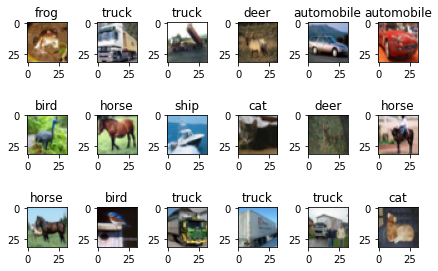

In [ ]:
nrows = 3
ncols = 6
fig, ax = plt.subplots(nrows, ncols)
ax_list = ax.reshape(-1)
for i in range(nrows*ncols):
    ax_list[i].imshow(training_data.data[i])
    ax_list[i].set_title(test_data.classes[training_data.targets[i]])
plt.tight_layout()

## Loading the data

In class with MNIST we evaluated all the data at once.  What is more common in Deep Learning is to instead load only a small "mini-batch" at a time.  Here we load mini-batches of size 64.

In [ ]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

X, y = next(iter(train_dataloader))
print("Shape of X:")
print(X.shape)

print("")

print("Shape of y:")
print(y.shape)

Shape of X:
torch.Size([64, 3, 32, 32])

Shape of y:
torch.Size([64])


Each MNIST image began as 28x28.  These CIFAR-10 images begin as 3x32x32.  The 32x32 are the dimensions in pixels, and the 3 refers to three color channels for RGB (red, green, blue).

## Building the neural network

Adapt the code from Monday and Wednesday of Week 7 to work with the CIFAR-10 dataset.  Perform the following steps.

1.  Define a constructor for the neural network, like our ThreeBlue constructor from class.  (You can choose a more appropriate name than ThreeBlue.)
2.  You'll need to change the input dimensions, since our images are not 28x28.
3.  Get rid of the "divide by 255" step, since that isn't necessary for this dataset.
4.  Replace the output layer `nn.Sigmoid` with `nn.LogSoftmax(dim=1)`.  This `nn.LogSoftmax` pairs well with the loss function we will use below.  The `dim=1` argument is analogous to the `axis=1` arguments we used often with NumPy and pandas.
5.  Test out your neural network on the X tensor that was defined above.  The result should look like nonsense; you're mostly testing to make sure there isn't an error.  The `shape` of the output should be bx10, where b is the batch size defined above.


## Define the loss function

1. Define a loss function.  Instead of using `nn.MSELoss` like we did on Wednesday, use `nn.NLLLoss`.
2. Test out the loss function.  The loss function should take two inputs, like `y_pred` and `y_true` from Wednesday.  For `y_pred`, use the output of the neural network when the input is `X`.  For `y_true`, just use `y`.  (Here `X` and `y` were defined a few sections above.)  You need to plug in first `y_pred` and then `y_true` (in that order).  This is easier than what we did on Wednesday, because we don't need to do any one-hot encoding.  When I tested the loss function, I got a loss of approximately 2.3 (yours will be different).

## Define the optimizer

1.  Define a stochastic gradient descent optimizer the same way as in class on Wednesday.

## Train the model

1.  Train the model using the following template.  We still have a for loop, with one iteration per epoch, but now we also have an inner for loop, using the data loaders from earlier.
2.  It is important that we also evaluate the loss on test data here, because neural networks are very prone to over-fitting, but be sure not to perform any optimization using the test data.
3.  Try to adjust the parameters of the model to improve the performance (which means, try to get a smaller test loss).  Some parameters you can try to adjust:
* The number of hidden layers and the sizes of those layers.  (More makes the model more flexible, but it also increases the risk of over-fitting.)
* The activation functions for the hidden layers (you can change `Sigmoid` to `ReLU`, for example).  But don't change the `LogSoftmax` output activation function.
* The learning rate `lr`.  (If your scores improve too slowly, then increase `lr`.  If your scores seem chaotic, try decreasing `lr`.)
* The batch size.  (I've read that 32 to 512 are common batch sizes.)
* The number of epochs.
* Don't change the `NLLLoss` loss function, but you can try changing the optimizer.  `torch.optim.Adam` is a common alternative to `SGD`.

In [ ]:
epochs = ???

for i in range(epochs):
    for X,y in train_dataloader:
        y_pred = ???
        y_true = ???
        loss = ???
        optimizer.zero_grad()
        ??? compute the gradient
        ??? adjust the weights and biases
    print("Training loss:") # We only print one loss per epoch
    print(loss)

    for X,y in test_dataloader:
        y_pred = ??? Same as above
        y_true = ??? Same as above
        loss = ??? Same as above, be sure not to perform gradient descent in this part
        print("Test loss:")
        print(loss)
        break # We only compute and print one test loss per epoch

    print("")

## Submission
Download the .ipynb file for this notebook (click on the folder icon to the left, then the … next to the file name) and upload the file on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9c8212e-e1a4-4b2c-bba4-0aa5e98dcd0d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>